# Computational Physics Lab 6

In [1]:
from scipy import integrate
import matplotlib.pylab as plt
import math
import cmath
import numpy as np
% matplotlib inline

## Newman Excercise 5.12

In [6]:
def f(x):
    '''This function computes a an equation that is one part in solving for the rate at which energy is radiated from
    a large body.
    
    Input(s):
    x = the variable in the integral
    
    Output(s):
    The value of the equation evaluated at x.'''
    
    return math.exp(-x)*x*x*x/(1-math.exp(-x))  # Had to rearange the equation by mutliplying the numerator and denominator by
                                                # e to the -x so that x cubed would not get too larg too quickly.


Plancks = 6.62607004*10**-34 # kg m^2 s^-1
h_bar = Plancks/(2*math.pi) # kg m^2 s^-1
Boltz = 1.38064852*10**-23 # m^2 kg s^-2 K^-1
c = 3.00*10**8 # m/s
N = 100
a = 10**-8
b = np.inf
T = 5778 # Temperature of the sun in Kelvin


constant = ((Boltz**4)*T**4)/(4*(math.pi)**2*c**2*h_bar**3)
integral, error = integrate.quad(f, a, b)
print("Total rate at which energy is radiated from the sun: ", constant*integral)
print("The error of this calculation is: ", error*constant)
print("The Stefan-Boltzmann constant is: ", constant*integral/T**4)

Total rate at which energy is radiated from the sun:  63113200.02842408
The error of this calculation is:  0.025545544574065705
The Stefan-Boltzmann constant is:  5.662523934769154e-08


## Newman Exercise 5.19

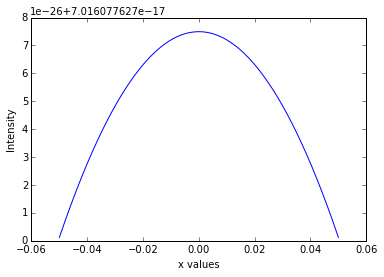

In [47]:
def q(u):
    ''' This function calculates and returns the transmission function.
    
    Input(s):
    u = distance from the central axis
    
    Output(s)
    Returns the transmission function at position u'''
    alpha = math.pi/2e-5
    return (math.sin(alpha*u)**2)

def integrand(u,x):
    
    '''This function computes the intensity of the diffraction pattern produced by a grating with 10 slits.
    
    Input(s):
    u = distance from central axis
    x = distance from central axis
    
    Output(s):
    part1 = The calculation of the square root of q(u)
    part2 = The calculation of the remaining terms in the integral.'''
    
    
    lamb = 500e-9 
    f = 1 # meters
    part1 = math.sqrt(q(u))
    part2 = cmath.exp(1j*2*math.pi*x*u/(lamb*f))
    
    return (part1*part2)
    

w = 2e-4 # meters
I = []
x_axis = np.linspace(-0.05,0.05,1000)

a = -w/2
b = w/2
N = 1000
h = (b-a)/N 

for i in x_axis:
   
    s = (integrand(a,i)/3 + integrand(b,i)/3)
    
    for k in range(1,N):
        if k%2 == 0:
            s += 2*(integrand(a+k*h, i))

        elif k%2 == 1:
            s += 4*(integrand(a+k*h, i))

        
        s = (h/3)*s
        
    I.append(abs(s)**2)
   
    
plt.plot(x_axis,I)
plt.xlabel("x values")
plt.ylabel("Intensity")

The above plot shows the intensity of light emitted by a diffraction pattern which is produced by a grating with ten slits.  The wavelength of the light is 500 nm.  The light is incident on a diffraction grating with a total width 2e-5 meters.  The light gets diffracted and is focused with a lense with a focal length of 1 meter.  The light then falls on a screen.  The peaks seen in the above graph show where the intensity is greatest.  This is where the light is brightest. These are the points where there is constructive interference between the light sources.  The lowest points on the graph show where there is destructive interference.  These are the darkest spots.  

Garett and I tried to debug this code for the better part of two hours, and since we were unable to come to a conclusion as to what was wrong with my code, I wrote these observations based on his plots.

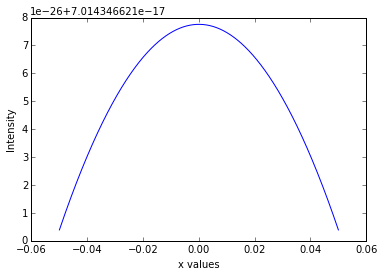

In [48]:
def q(u):
    ''' This function calculates and returns the transmission function.
    
    Input(s):
    u = distance from the central axis

    Output(s)
    Returns the transmission function at position u'''
    return (math.sin(alpha*u)**2*math.sin(alpha/2*u)**2)

w = 2e-4 # meters
I = []
x_axis = np.linspace(-0.05,0.05,1000)

for i in x_axis:
    a = -w/2
    b = w/2
    N = 1000
    h = (b-a)/N  
    s = (integrand(a,i)/3 + integrand(b,i)/3)
    
    for k in range(1,N):
        if k%2 == 0:
            s += 2*(integrand(a+k*h, i))

        elif k%2 == 1:
            s += 4*(integrand(a+k*h, i))

        
        s = (h/3)*s
        
    I.append(abs(s)**2)
   
    
plt.plot(x_axis,I)
plt.xlabel("x values")
plt.ylabel("Intensity")

This plot shows the intensity pattern with a different transmission function.  In comparision to the first graph, this graph has more high points, but a smaller magnitude.   

Garett and I tried to debug this code for the better part of two hours, and since we were unable to come to a conclusion as to what was wrong with my code, I wrote these observations based on his plots.